# W207 - Final Project
## Scott Abramson, Brett Brandom, Maria Jose Healey, Yidai Yao

### <span style="color:chocolate"> Pawpularity:predicting engagement with a pet's profile based on the photograph for that profile.  </span>

#### ``Objective``

TBD

#### ``Introduction``

TBD

#### ``Data``

TBD

### Step 1: Import libraries

In [28]:
import numpy as np
import pandas as pd
import random

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import keras

import sklearn
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=UserWarning) #used to supress the tf version warning. 

import glob
import cv2
 


### Step 2: Read Data

In [2]:
# load images
cv_images = []
# the glob module is used to retrieve files/pathnames matching a specified pattern.
for image in glob.glob("C:\\Users\\maggi\\OneDrive\\Desktop\\DataSci-207\\Final Project\\train\\*.jpg"):
    img= cv2.imread(image) # loads an image from the specified file
    cv_images.append(img)
    


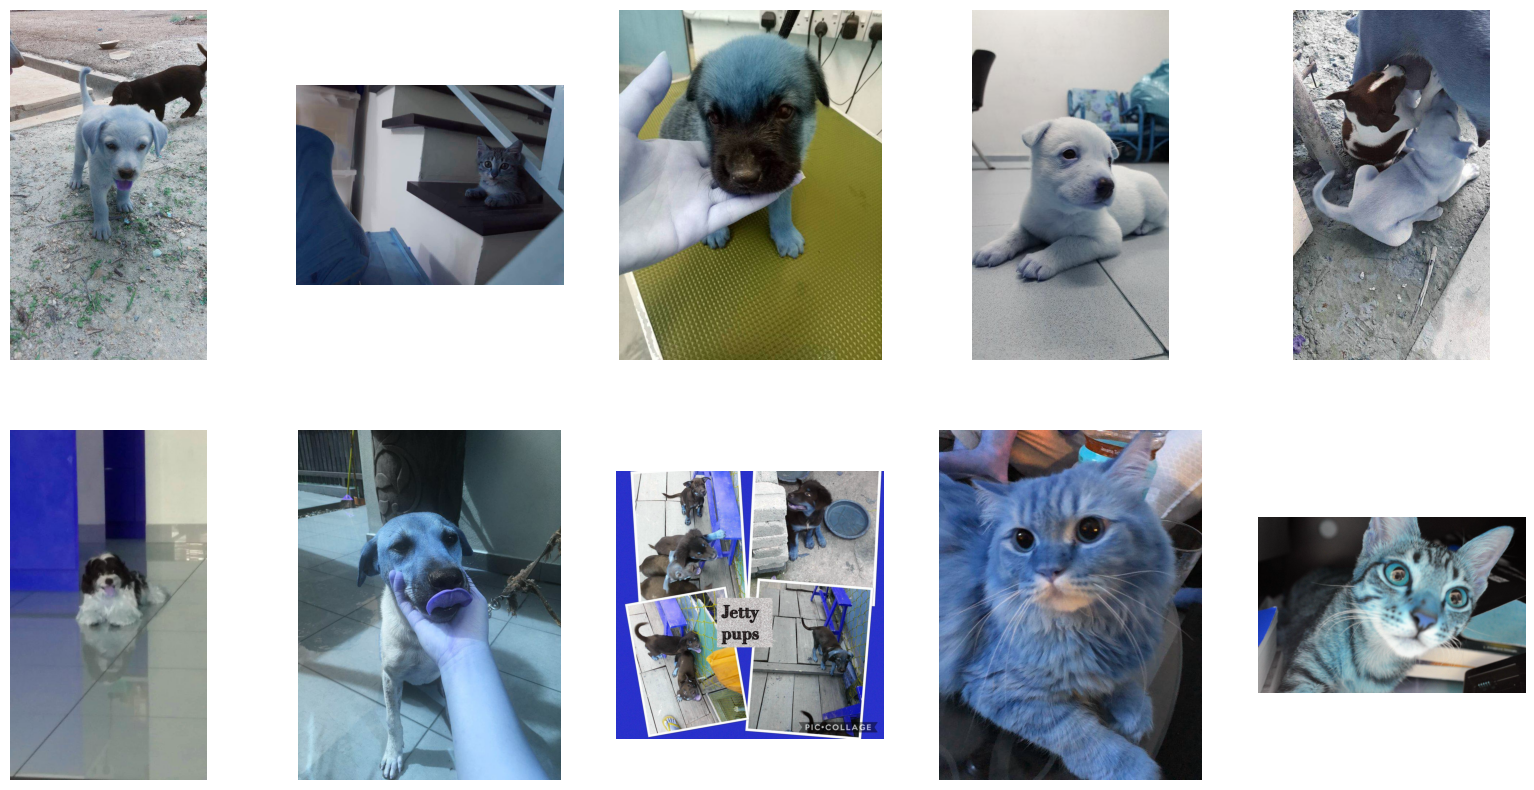

In [3]:
# Display 10 images
index=0
num_rows=2
num_cols=5
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20,10))
for i in range(num_rows):
    for j in range(num_cols):
        axs[i,j].imshow(cv_images[index]) 
        axs[i,j].axis('off')
        index+=1
plt.show()

In [4]:
# load tabular data
path = 'C:\\Users\\maggi\\OneDrive\\Desktop\\DataSci-207\\Final Project\\'
train_df = pd.read_csv(path + 'train.csv')
train_df

Id  Subject Focus  Eyes  Face  Near  \
0     0007de18844b0dbbb5e1f607da0606e0              0     1     1     1   
1     0009c66b9439883ba2750fb825e1d7db              0     1     1     0   
2     0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1   
3     0018df346ac9c1d8413cfcc888ca8246              0     1     1     1   
4     001dc955e10590d3ca4673f034feeef2              0     0     0     1   
...                                ...            ...   ...   ...   ...   
9907  ffbfa0383c34dc513c95560d6e1fdb57              0     0     0     1   
9908  ffcc8532d76436fc79e50eb2e5238e45              0     1     1     1   
9909  ffdf2e8673a1da6fb80342fa3b119a20              0     1     1     1   
9910  fff19e2ce11718548fa1c5d039a5192a              0     1     1     1   
9911  fff8e47c766799c9e12f3cb3d66ad228              0     1     1     1   

      Action  Accessory  Group  Collage  Human  Occlusion  Info  Blur  \
0          0          0      1        0      0          0     0     0   
1          0          0      0        0      0          0     0     0   
2          0          0      0        0      1          1     0     0   
3          0          0      0        0      0          0     0     0   
4          0          0      1        0      0          0     0     0   
...      ...        ...    ...      ...    ...        ...   ...   ...   
9907       0          0      0        0      0          0     0     1   
9908       0          0      0        0      0          0     0     0   
9909       0          0      0        0      1          1     0     0   
9910       0          0      0        0      1          0     0     0   
9911       0          0      0        0      0          0     0     0   

      Pawpularity  
0              63  
1              42  
2              28  
3              15  
4              72  
...           ...  
9907           15  
9908           70  
9909           20  
9910           20  
9911           30  

[9912 rows x 14 columns]

### Step 3: EDA

In [5]:
# Checking the number of images
print("Number of images", len(cv_images))

Number of images 9912


In [6]:
# First image and its shape
print("First Image ", cv_images[0])
print("First Image shape ", np.array(cv_images[0]).shape)

First Image  [[[198 184 190]
  [201 187 193]
  [185 171 177]
  ...
  [139 124 121]
  [138 123 120]
  [137 122 119]]

 [[117 103 109]
  [124 110 116]
  [119 105 111]
  ...
  [195 183 179]
  [193 181 177]
  [191 179 175]]

 [[142 128 132]
  [136 122 126]
  [127 113 117]
  ...
  [194 182 180]
  [191 179 177]
  [186 174 172]]

 ...

 [[152 151 160]
  [150 149 158]
  [141 140 149]
  ...
  [199 203 204]
  [198 202 203]
  [195 199 200]]

 [[153 152 161]
  [157 156 165]
  [145 144 153]
  ...
  [191 195 196]
  [190 194 195]
  [186 190 191]]

 [[146 145 154]
  [158 157 166]
  [146 145 154]
  ...
  [182 186 187]
  [183 187 188]
  [181 185 186]]]
First Image shape  (720, 405, 3)


In [7]:
# Checking first 50 images' sizes
for i in range( len(cv_images) ):
    n_shape= np.array(cv_images[i])
    print(f"{i}" + " Image shape ", n_shape.shape)
    if i == 50:
        break

0 Image shape  (720, 405, 3)
1 Image shape  (774, 1032, 3)
2 Image shape  (960, 720, 3)
3 Image shape  (720, 405, 3)
4 Image shape  (960, 540, 3)
5 Image shape  (960, 540, 3)
6 Image shape  (960, 720, 3)
7 Image shape  (1280, 1280, 3)
8 Image shape  (960, 720, 3)
9 Image shape  (847, 1279, 3)
10 Image shape  (1280, 1280, 3)
11 Image shape  (720, 405, 3)
12 Image shape  (960, 540, 3)
13 Image shape  (960, 720, 3)
14 Image shape  (638, 581, 3)
15 Image shape  (960, 720, 3)
16 Image shape  (960, 1280, 3)
17 Image shape  (647, 648, 3)
18 Image shape  (960, 528, 3)
19 Image shape  (960, 720, 3)
20 Image shape  (569, 538, 3)
21 Image shape  (720, 1280, 3)
22 Image shape  (720, 960, 3)
23 Image shape  (960, 720, 3)
24 Image shape  (960, 960, 3)
25 Image shape  (960, 720, 3)
26 Image shape  (960, 467, 3)
27 Image shape  (853, 1280, 3)
28 Image shape  (960, 720, 3)
29 Image shape  (960, 540, 3)
30 Image shape  (960, 960, 3)
31 Image shape  (960, 720, 3)
32 Image shape  (939, 1242, 3)
33 Image s

In [8]:
# Checking for target minimum and maximum values
target_minvalue = train_df['Pawpularity'].min() 
target_maxvalue = train_df['Pawpularity'].max() 
print("Target minimum value: ", target_minvalue)
print("Target maximum value: ", target_maxvalue)

Target minimum value:  1
Target maximum value:  100


In [9]:
# Checking for missing values in tabular data
print(train_df.isnull().sum() )

Id               0
Subject Focus    0
Eyes             0
Face             0
Near             0
Action           0
Accessory        0
Group            0
Collage          0
Human            0
Occlusion        0
Info             0
Blur             0
Pawpularity      0
dtype: int64


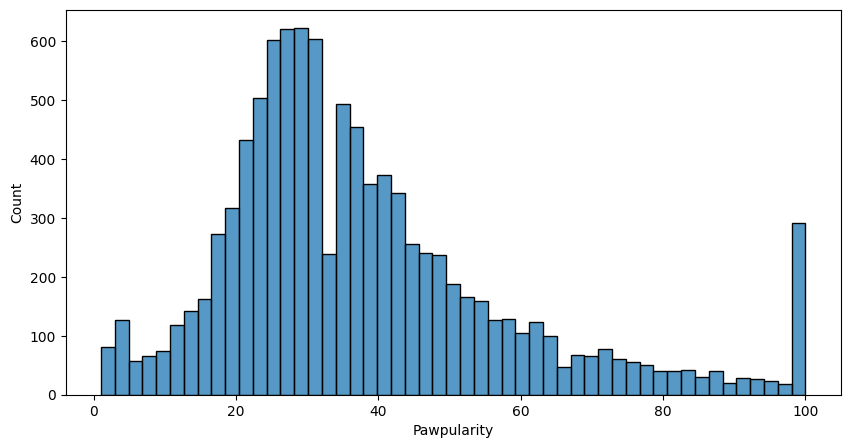

In [10]:
# Plot the target class distribution

# convert the labels array to a pandas dataframe
labels_df = pd.DataFrame(train_df['Pawpularity'], columns =['Pawpularity'])
# histogram
plt.figure(figsize=(10,5))
sns.histplot(data= labels_df, stat= 'count', x='Pawpularity')
plt.xlabel("Pawpularity");

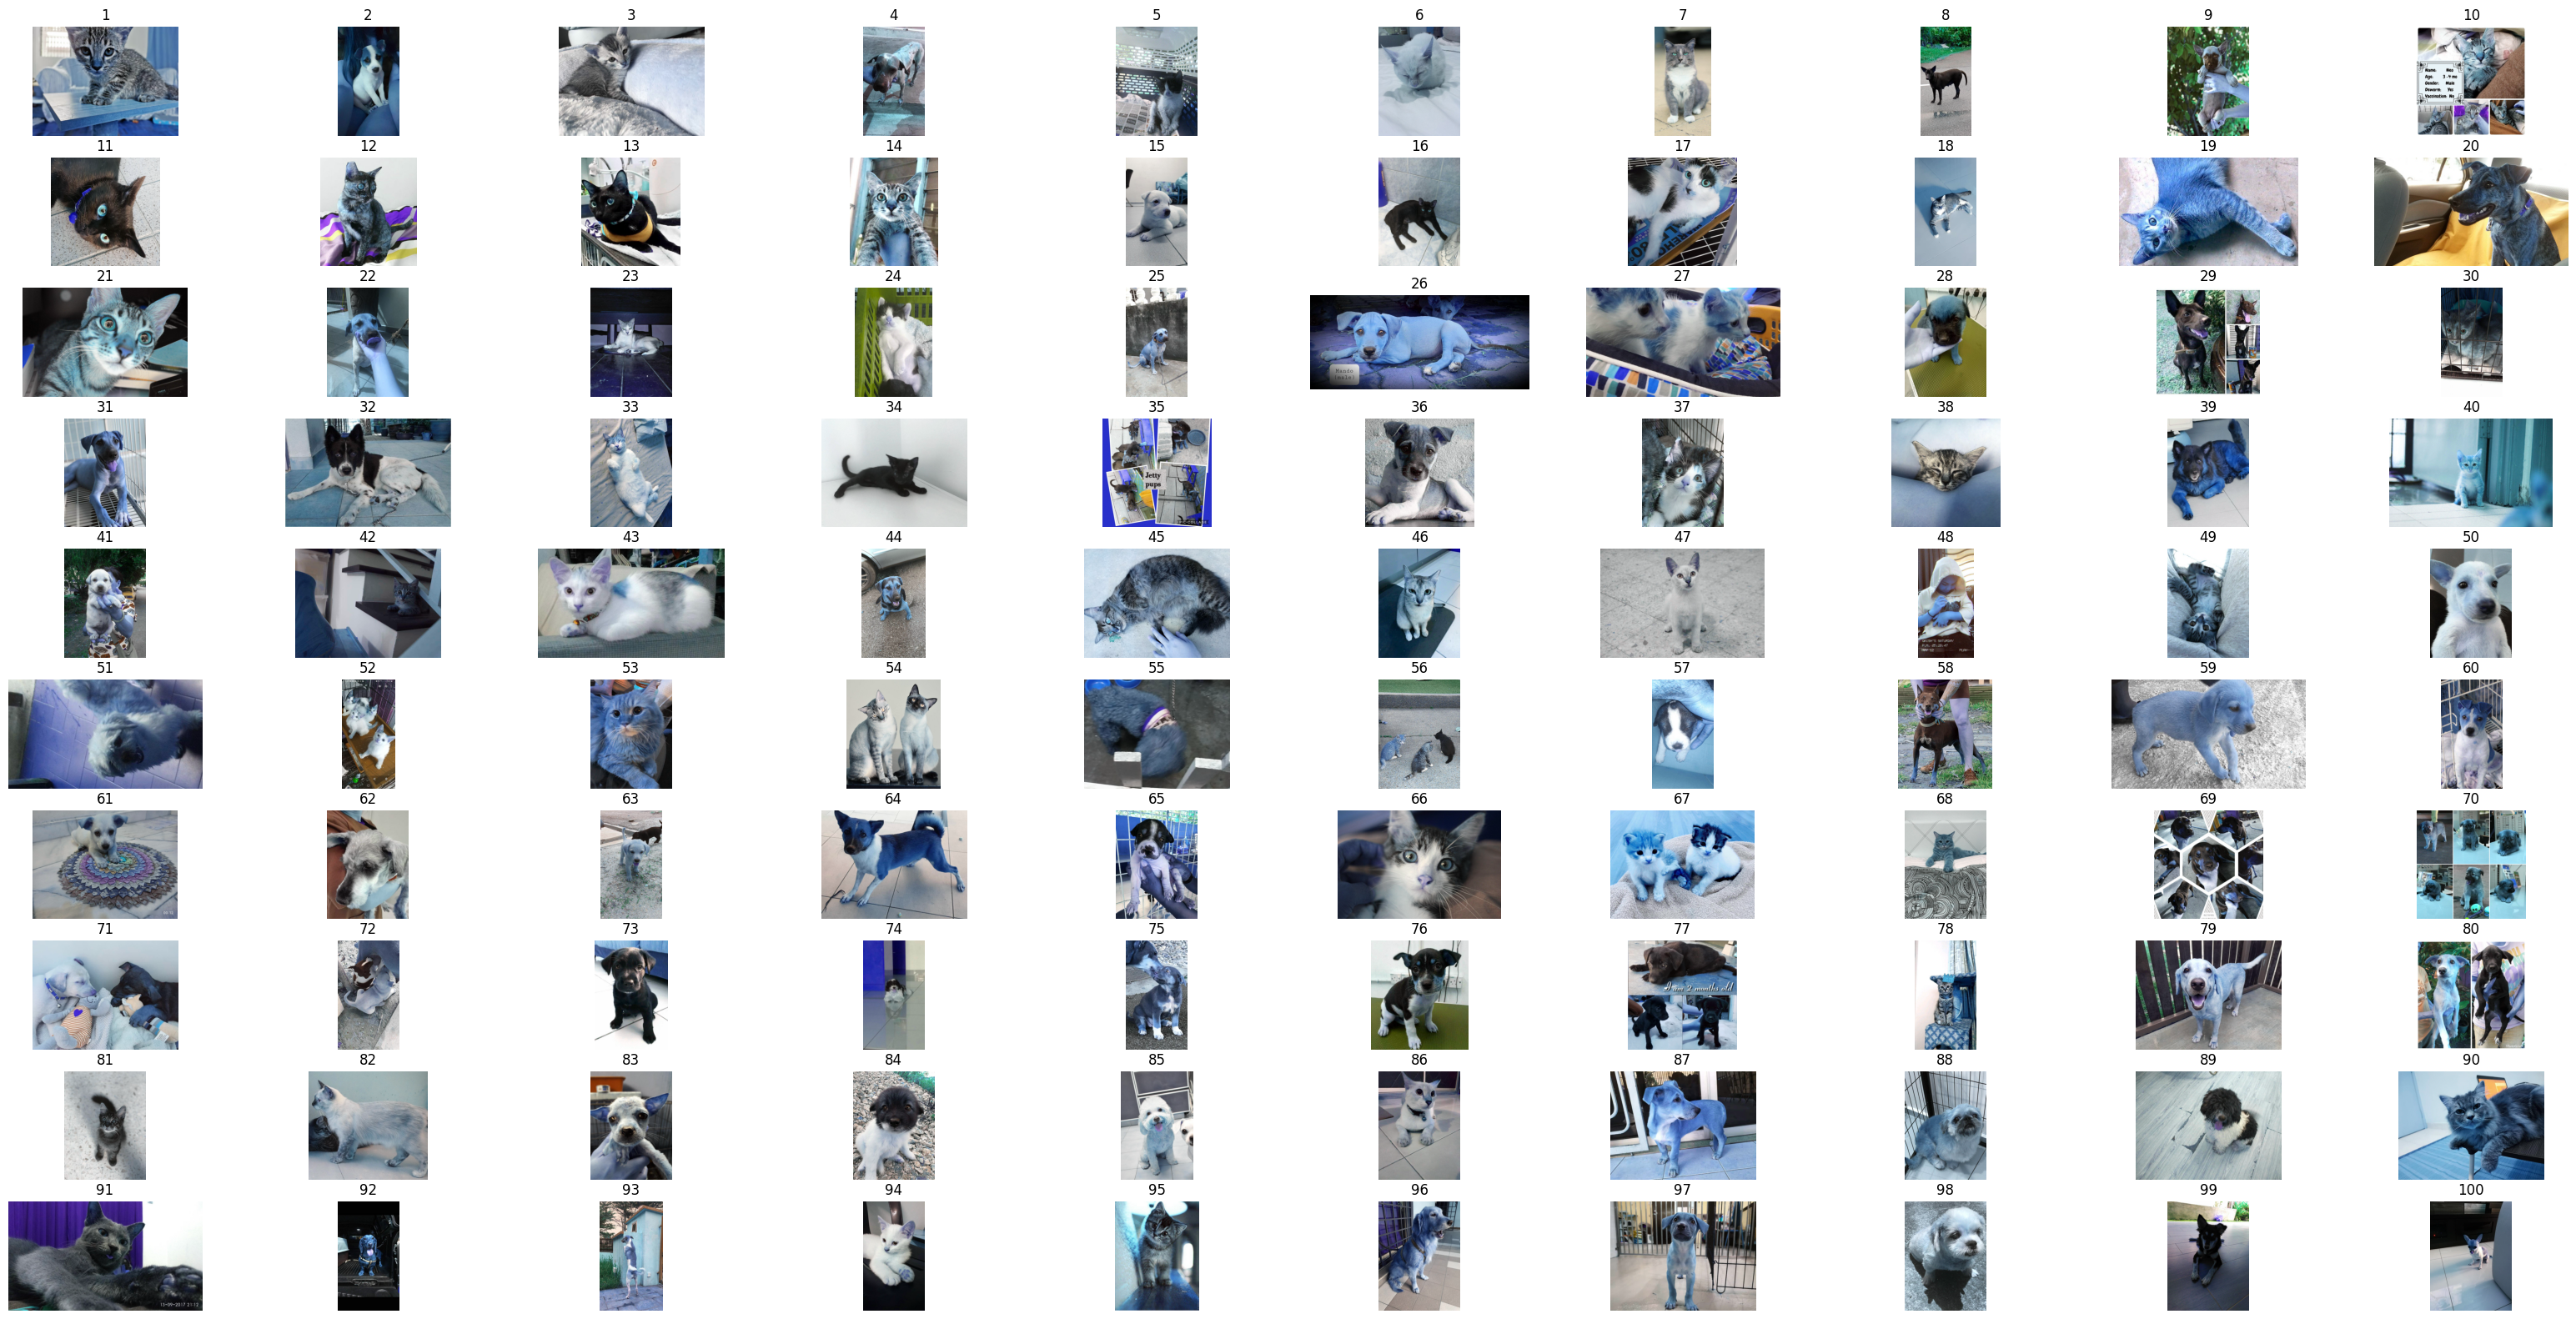

In [11]:
# Inspect one image per target label

# list of unique class labels
classes = np.unique(train_df['Pawpularity']) 
# Initialize indexes and class label lists
indexes = []
class_labels = []
# iterate over class labels 
for label in classes:
    # find index of the first image for each class
    indexes.append(labels_df[labels_df.Pawpularity.eq(label)].index[0]) # appends the first index of each specified label found in the dataframe
    class_labels.append(label)

# Inspect (print) one image from each class. 
index=0 # to keep track of class labels
num_rows=10
num_cols=10
fig, axs = plt.subplots(num_rows, num_cols, figsize=(40,20))
for i in range(num_rows):
    for j in range(num_cols):
        axs[i,j].imshow(array_to_img(cv_images[indexes[index]])) # array_to_img() converts a 3D Numpy array to a PIL Image instance.
        axs[i,j].set_title(class_labels[index])
        axs[i,j].axis('off')
        index+=1
plt.show()

### Step 4: Preprocess Data

In [12]:
# Find the smallest m and largest n in image shape dimensions
# function to find the smallest and largest m and n
def small_large (images_shape):
    dim_list = [1000000,1000000,0,0] # [small_m,small_n, large_m,large_n]
    for i in range( len(images_shape) ):
        n_shape= np.array(images_shape[i])
        # update smallest and largest m
        if n_shape.shape[0] > dim_list[2]:
            dim_list[2] = n_shape.shape[0]
        elif n_shape.shape[0] < dim_list[0]:
           dim_list[0] = n_shape.shape[0]
        # update smallest and largest n
        if n_shape.shape[1] > dim_list[3]:
            dim_list[3] = n_shape.shape[1]
        elif n_shape.shape[1] < dim_list[1]:
            dim_list[1] = n_shape.shape[1]

    return dim_list

dimensions = small_large (cv_images)
print("Smallest m : ", dimensions[0], "\tLargest m : ", dimensions[2])
print("Smallest n : ", dimensions[1], "\tLargest n : ", dimensions[3])
    


Smallest m :  113 	Largest m :  1280
Smallest n :  90 	Largest n :  1280


In [13]:
# Resize images
resized_images = []
for i in range( len(cv_images) ):
    resize_img = cv2.resize(cv_images[i], (540, 960))
    resized_images.append(resize_img)

print(resized_images[0])
print(resized_images[0].shape)

[[[198 184 190]
  [200 186 192]
  [195 181 187]
  ...
  [138 123 120]
  [137 123 119]
  [137 122 119]]

 [[147 133 139]
  [151 137 143]
  [149 135 141]
  ...
  [173 160 156]
  [172 158 155]
  [171 158 154]]

 [[126 112 118]
  [128 114 119]
  [126 112 117]
  ...
  [193 181 178]
  [191 179 176]
  [189 177 174]]

 ...

 [[153 152 161]
  [154 153 162]
  [150 149 158]
  ...
  [193 197 198]
  [192 196 196]
  [189 193 194]]

 [[150 149 158]
  [155 154 163]
  [153 152 161]
  ...
  [187 191 192]
  [186 190 191]
  [184 188 189]]

 [[146 145 154]
  [153 152 161]
  [153 152 161]
  ...
  [183 187 187]
  [182 186 187]
  [181 185 186]]]
(960, 540, 3)


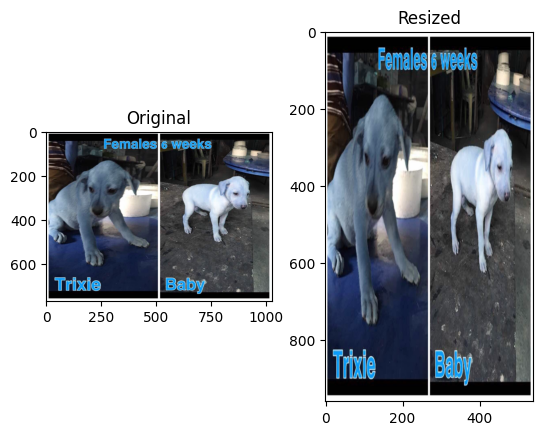

In [14]:
img_list = [cv_images[250], resized_images[250]]
titles = ["Original", "Resized"]
for i in  range(2):
    plt.subplot (1,2,i+1)
    plt.title (titles[i])
    plt.imshow(img_list[i])

plt.show()

In [15]:
# Checking first 50 resized images' sizes
for i in range( len(resized_images) ):
    n_shape= np.array(resized_images[i])
    print(f"{i}" + " Image shape ", n_shape.shape)
    if i == 50:
        break

0 Image shape  (960, 540, 3)
1 Image shape  (960, 540, 3)
2 Image shape  (960, 540, 3)
3 Image shape  (960, 540, 3)
4 Image shape  (960, 540, 3)
5 Image shape  (960, 540, 3)
6 Image shape  (960, 540, 3)
7 Image shape  (960, 540, 3)
8 Image shape  (960, 540, 3)
9 Image shape  (960, 540, 3)
10 Image shape  (960, 540, 3)
11 Image shape  (960, 540, 3)
12 Image shape  (960, 540, 3)
13 Image shape  (960, 540, 3)
14 Image shape  (960, 540, 3)
15 Image shape  (960, 540, 3)
16 Image shape  (960, 540, 3)
17 Image shape  (960, 540, 3)
18 Image shape  (960, 540, 3)
19 Image shape  (960, 540, 3)
20 Image shape  (960, 540, 3)
21 Image shape  (960, 540, 3)
22 Image shape  (960, 540, 3)
23 Image shape  (960, 540, 3)
24 Image shape  (960, 540, 3)
25 Image shape  (960, 540, 3)
26 Image shape  (960, 540, 3)
27 Image shape  (960, 540, 3)
28 Image shape  (960, 540, 3)
29 Image shape  (960, 540, 3)
30 Image shape  (960, 540, 3)
31 Image shape  (960, 540, 3)
32 Image shape  (960, 540, 3)
33 Image shape  (960

In [16]:
# Split data
def split_data(images, labels, split):
    '''Split data into train, validation and test sets.
    
    Parameters:
    images  (np.ndarray): Images of shape (N, 960, 540, 3)
    labels (np.ndarray): Labels of shape (N,)   
    split (tuple): 3 values summing to 1 defining split of train, validation and test sets
    
    Returns:
    X_train (np.ndarray): Train images of shape (N_train, 960, 540, 3)
    y_train (np.ndarray): Train labels of shape (N_train,)
    X_val (np.ndarray): Val images of shape (N_val, 960, 540, 3)
    y_val (np.ndarray): Val labels of shape (N_val,)
    X_test (np.ndarray): Test images of shape (N_test, 960, 540, 3)
    y_test (np.ndarray): Test labels of shape (N_test,)
    
    '''
    # NOTE: Each time you run this cell, you'll re-shuffle the data. The ordering will be the same due to the random seed generator 
    tf.random.set_seed(1234)
    np.random.seed(1234)
    
    # Apply random shufflying to training examples.
    indices = np.arange(labels.shape[0])
    shuffled_indices = np.random.permutation(indices)
    images = images[shuffled_indices]
    labels = labels[shuffled_indices]
    
    split_train_val_test= np.multiply(len(images),split).astype(int) # returns an array with the number of instances split into 3 groups (p,q,r)
    X_train,X_val,X_test= np.split(images, [split_train_val_test[0],split_train_val_test[0]+split_train_val_test[1]]) # splits images into 60,20,20
    y_train,y_val,y_test= np.split(labels, [split_train_val_test[0],split_train_val_test[0]+split_train_val_test[1]]) # splits labels into 60,20,20
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [17]:
# Create train, validation and test sets from data

# labels
labels = np.array(train_df['Pawpularity'])
# define splits
split = (0.6, 0.2, 0.2)
# create train, val, test sets
X_train, y_train, X_val, y_val, X_test, y_test = split_data(np.array(resized_images), labels, split)

# Print shapes
print('Shape of train images ', X_train.shape)
print('Shape of train labels ', y_train.shape)

print('Shape of val images ', X_val.shape)
print('Shape of val labels ', y_val.shape)

print('Shape of test images ', X_test.shape)
print('Shape of test labels ', y_test.shape)

Shape of train images  (5947, 960, 540, 3)
Shape of train labels  (5947,)
Shape of val images  (1982, 960, 540, 3)
Shape of val labels  (1982,)
Shape of test images  (1983, 960, 540, 3)
Shape of test labels  (1983,)


### Step 5: Modeling and Evaluation

### <span style="color:chocolate"> Baseline Model  </span>

In [20]:
# baseline: select the majority class (the most common label in the training set)
majority_class = np.bincount(labels).argmax() 
print("Majority class: ", majority_class) 

Majority class:  28


In [23]:
# computes the RMSE of the baseline on the train data
diff_train_data = y_train - majority_class # predictions - outputs
loss_train_data = np.sqrt(np.square(diff_train_data).mean())
print("RMSE of the baseline on the train data: ", loss_train_data)

# computes the RMSE of the baseline on the test data
diff_test_data = y_test - majority_class
loss_test_data = np.sqrt(np.square(diff_test_data).mean())
print("RMSE of the baseline on the test data: ", loss_test_data)

RMSE of the baseline on the train data:  22.585919504835985
RMSE of the baseline on the test data:  23.57945976574051


### <span style="color:chocolate"> Improvement on Baseline Model  </span>

## Model 1

In [26]:
def build_model(n_classes, learning_rate=0.01):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of classes in the dataset
    learning_rate: The desired learning rate for Adam optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax"
  ))

  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
  model.compile(loss="sparse_categorical_crossentropy", 
                optimizer=optimizer, 
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

In [47]:
model = build_model(len(labels), 0.01)

history = model.fit(
  x = X_train[:200],
  y = y_train[:200],
  epochs=5,
  batch_size=16,
  validation_data=(X_val[:200], y_val[:200]),
  verbose=0)

ResourceExhaustedError: in user code:

    File "C:\Users\maggi\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\maggi\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\maggi\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\maggi\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\maggi\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\maggi\anaconda3\envs\tf\lib\site-packages\keras\backend.py", line 2100, in random_uniform
        return tf.random.stateless_uniform(

    ResourceExhaustedError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).
    
    {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[1555200,9912] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:StatelessRandomUniformV2]
    
    Call arguments received by layer "sequential" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 960, 540, 3), dtype=uint8)
      • training=True
      • mask=None


In [ ]:
history = pd.DataFrame(history.history)
display(history)

In [ ]:
# Recall that model.predict gives a vector of probabilities for each x.
# Get labels by taking the argmax -- the index with the largest probability.
test_predictions = np.argmax(model.predict(X_test), axis=-1)
print(test_predictions)

## Model 2

In [31]:
# Build the model - create 2D convolutional layers  --- color is still 2D (3D needs depth)
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=[X_train.shape[1],X_train.shape[2],3]), # input shape 960x540x3
    keras.layers.MaxPooling2D(pool_size=(2,2)), # convolution takes neighboring pixels -> lose resolution but need to maintain scale and that's why you pool (choose max of a 2x2 neighbor)
    keras.layers.Dropout(0.4), # dropout layers are layers which drop off some connections --- will drop 40%
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'), # padding is trying to keep the shape the same (in this case 960x540)
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(), # whenever you go from these convolutions being done to the fully connected layer, we flatten it out into a 1 dimension vector
    keras.layers.Dense(units=100, activation='relu'), # multilayer perceptron - regression task---dropout layers will drop 40% of these units
    keras.layers.Dropout(0.4),
    keras.layers.Dense(units=len(labels), activation='softmax') # we are predicting 100 values 
])
model.compile(loss='sparse_categorical_crossentropy', metrics=[tf.keras.metrics.RootMeanSquaredError()], optimizer='adam') # sparse_categorical_crossentropy provides labels as integers

In [51]:
# Set random seed to get reproductible results
tf.random.set_seed(1234)
np.random.seed(1234)

# Train/fit the DL model 
history = model.fit(X_train[:200], y_train[:200], epochs=10, validation_data=(X_val[:200], y_val[:200]))

Epoch 1/10


ResourceExhaustedError: in user code:

    File "C:\Users\maggi\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\maggi\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\maggi\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\maggi\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\maggi\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\maggi\anaconda3\envs\tf\lib\site-packages\keras\backend.py", line 2100, in random_uniform
        return tf.random.stateless_uniform(

    ResourceExhaustedError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).
    
    {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[1555200,9912] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:StatelessRandomUniformV2]
    
    Call arguments received by layer "sequential" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 960, 540, 3), dtype=uint8)
      • training=True
      • mask=None


In [ ]:
history = pd.DataFrame(history.history)
display(history)

In [ ]:
# Evaluate the trained DL model 
model.evaluate(X_test, y_test)

### Step 6: Conclusion

TBD